In [1]:
import numpy as np
import matplotlib.pyplot as plt 

from sortedcontainers import SortedList


In [2]:
class KNN(object):
  def __init__(self, k):
    self.k = k

  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self, X):
    y = np.zeros(len(X))

    # для каждого X[i]
      # вычислить расстояния от X[i] до self.X[j]

    for i, x in enumerate(X):
      sl = SortedList()
      for j, x_train in enumerate(self.X):
        diff = x - x_train
        d = diff.dot(diff)
        if (len(sl) < self.k):
          sl.add( (d, self.y[j]) )
        else:
          if (d < sl[-1][0] ):
            del sl[-1]
            sl.add( (d, self.y[j]) )

    # для _k_ ближайших к X[i] соседей:
      # найти наиболее часто встречающийся класс (c)
      # y[i] = c
      
      votes = {}
      for _, v in sl:
          votes[v] = votes.get(v, 0) + 1
      

      max_votes = 0
      max_votes_class = -1
      for v, count in votes.items():
          if count > max_votes:
              max_votes = count
              max_votes_class = v
      y[i] = max_votes_class
    return y
        
  def score(self, X, y):
    P = self.predict(X)
    return np.mean(P == y)
      

    

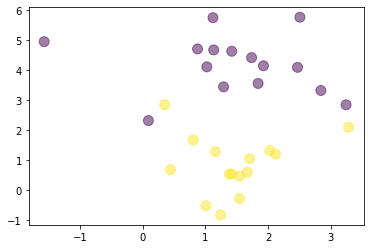

In [3]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs

# X, y = make_moons(n_samples=100, random_state=42)
X, y = make_blobs(n_samples=30, centers=2, n_features=2,
                  random_state=0)
plt.scatter(X[:,0], X[:,1], s=100, c=y, alpha=0.5)
plt.show()




In [4]:
model = KNN(1)

In [5]:
X_train, y_train = X[:20], y[:20]
X_test, y_test = X[20:], y[20:]
model.fit(X_train, y_train)

In [6]:
y_pred = model.predict(X_test)
y_pred == y_test

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True])

In [7]:
model.score(X_test, y_test)

0.9

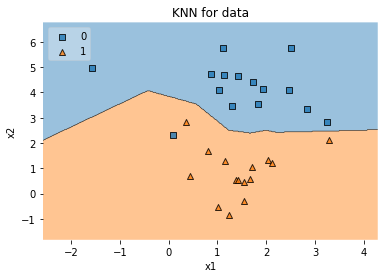

In [8]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('KNN for data')
plt.show()

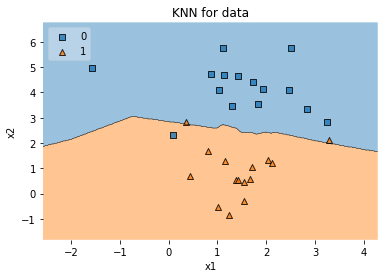

In [9]:
model = KNN(3)
model.fit(X, y)
plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('KNN for data')
plt.show()

In [17]:
# circles dataset 

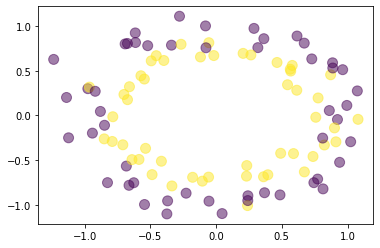

In [31]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=100, noise=0.1)
plt.scatter(X[:,0], X[:,1], s=100, c=y, alpha=0.5)
plt.show()


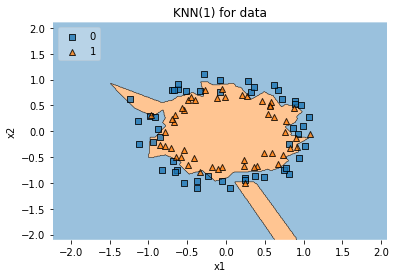

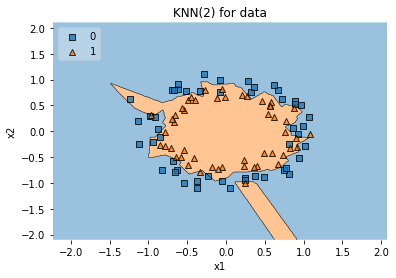

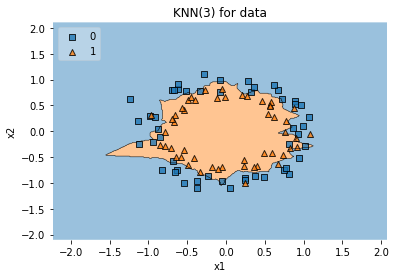

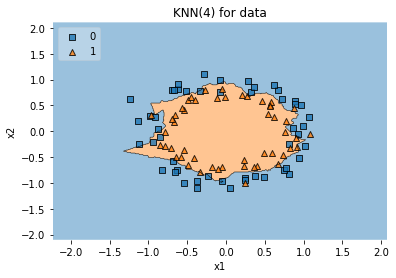

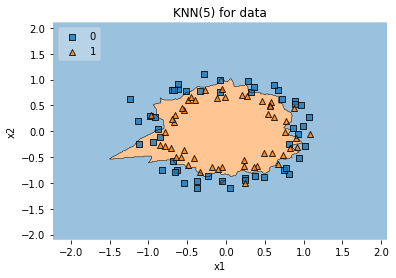

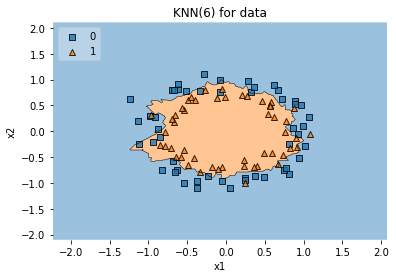

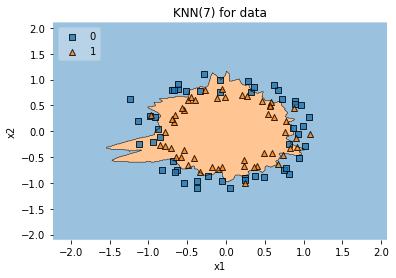

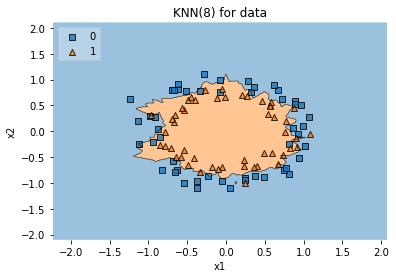

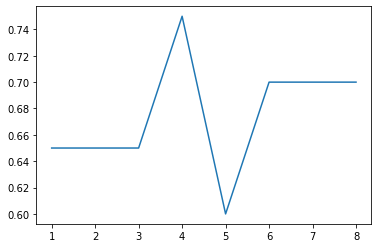

In [33]:
X_train, y_train = X[:80], y[:80]
X_test, y_test = X[80:], y[80:]
scores = []
for i in range(1, 9):
    model = KNN(i)
    model.fit(X_train, y_train)
    plot_decision_regions(X, y, clf=model, legend=2)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('KNN({}) for data'.format(i))
    plt.show()
    scores.append(model.score(X_test, y_test))
plt.plot(range(1,9), scores)

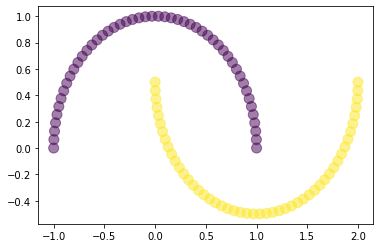

In [37]:
X, y = make_moons(n_samples=100, random_state=42)
plt.scatter(X[:,0], X[:,1], s=100, c=y, alpha=0.5)
plt.show()


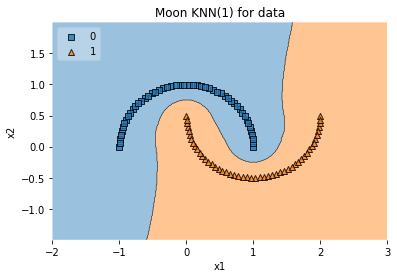

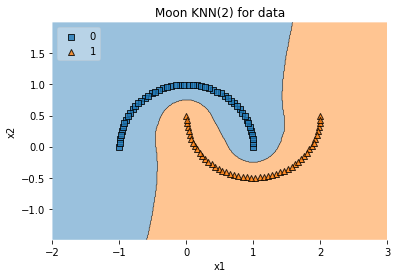

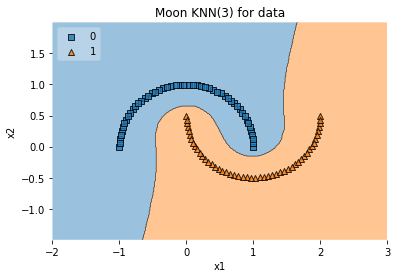

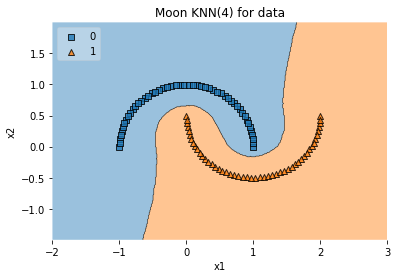

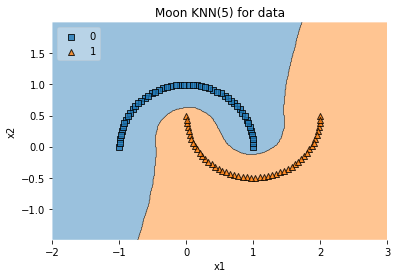

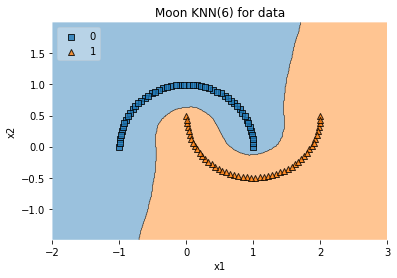

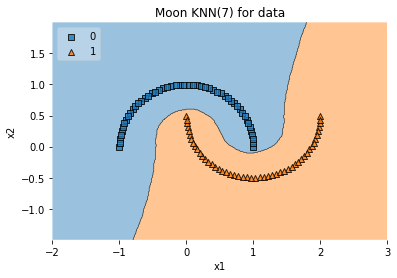

In [ ]:
X_train, y_train = X[:80], y[:80]
X_test, y_test = X[80:], y[80:]
scores = []
for i in range(1, 9):
    model = KNN(i)
    model.fit(X_train, y_train)
    plot_decision_regions(X, y, clf=model, legend=2)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Moon KNN({}) for data'.format(i))
    plt.show()
    scores.append(model.score(X_test, y_test))
plt.plot(range(1,9), scores)

n_clusters : 4


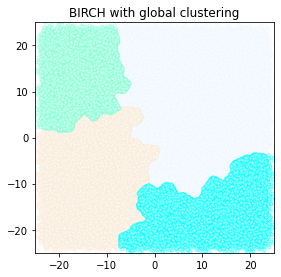

In [36]:
from itertools import cycle
from time import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn.cluster import Birch, MiniBatchKMeans
from sklearn.datasets import make_blobs


# Generate centers for the blobs so that it forms a 10 X 10 grid.
xx = np.linspace(-22, 22, 20)
yy = np.linspace(-22, 22, 20)
xx, yy = np.meshgrid(xx, yy)
n_centres = np.hstack((np.ravel(xx)[:, np.newaxis],
                       np.ravel(yy)[:, np.newaxis]))

# Generate blobs to do a comparison between MiniBatchKMeans and BIRCH.
X, y = make_blobs(n_samples=100000, centers=n_centres, random_state=0)

# Use all colors that matplotlib provides by default.
colors_ = cycle(colors.cnames.keys())

fig = plt.figure(figsize=(12, 4))
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.1, top=0.9)

# Compute clustering with BIRCH with and without the final clustering step
# and plot.
birch_model = Birch(threshold=1.7, n_clusters=4)
final_step = 'with global clustering'
birch_model.fit(X)

# Plot result
labels = birch_model.labels_
centroids = birch_model.subcluster_centers_
n_clusters = np.unique(labels).size
print("n_clusters : %d" % n_clusters)


ax = fig.add_subplot(1, 3, ind + 1)
for this_centroid, k, col in zip(centroids, range(n_clusters), colors_):
    mask = labels == k
    ax.scatter(X[mask, 0], X[mask, 1],
               c='w', edgecolor=col, marker='.', alpha=0.5)
    if birch_model.n_clusters is None:
        ax.scatter(this_centroid[0], this_centroid[1], marker='+',
                   c='k', s=25)
ax.set_ylim([-25, 25])
ax.set_xlim([-25, 25])
ax.set_autoscaley_on(False)
ax.set_title('BIRCH %s' % info)


plt.show()